# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# 2. EDA & Data Preprocessing

In [2]:
# Load dataset
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Size of Dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 200
Number of columns: 4


In [4]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df.columns.duplicated()
cols = list(df.columns)
print(f"Duplicated Column: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df = df.loc[:,~df.columns.duplicated()].copy()

print("After removing...")

dup_cols = df.columns.duplicated()
cols = list(df.columns)
print(f"Duplicated Column: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Column: 
[]
After removing...
Duplicated Column: 
[]


In [5]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# List of all columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# Drop unnecessary columns
# df = df.drop([''], axis=1)
# df = df.reset_index(drop=True)
# df.columns

In [8]:
# Remove row with missing values
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# Drop duplicated rows
print("Number of duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


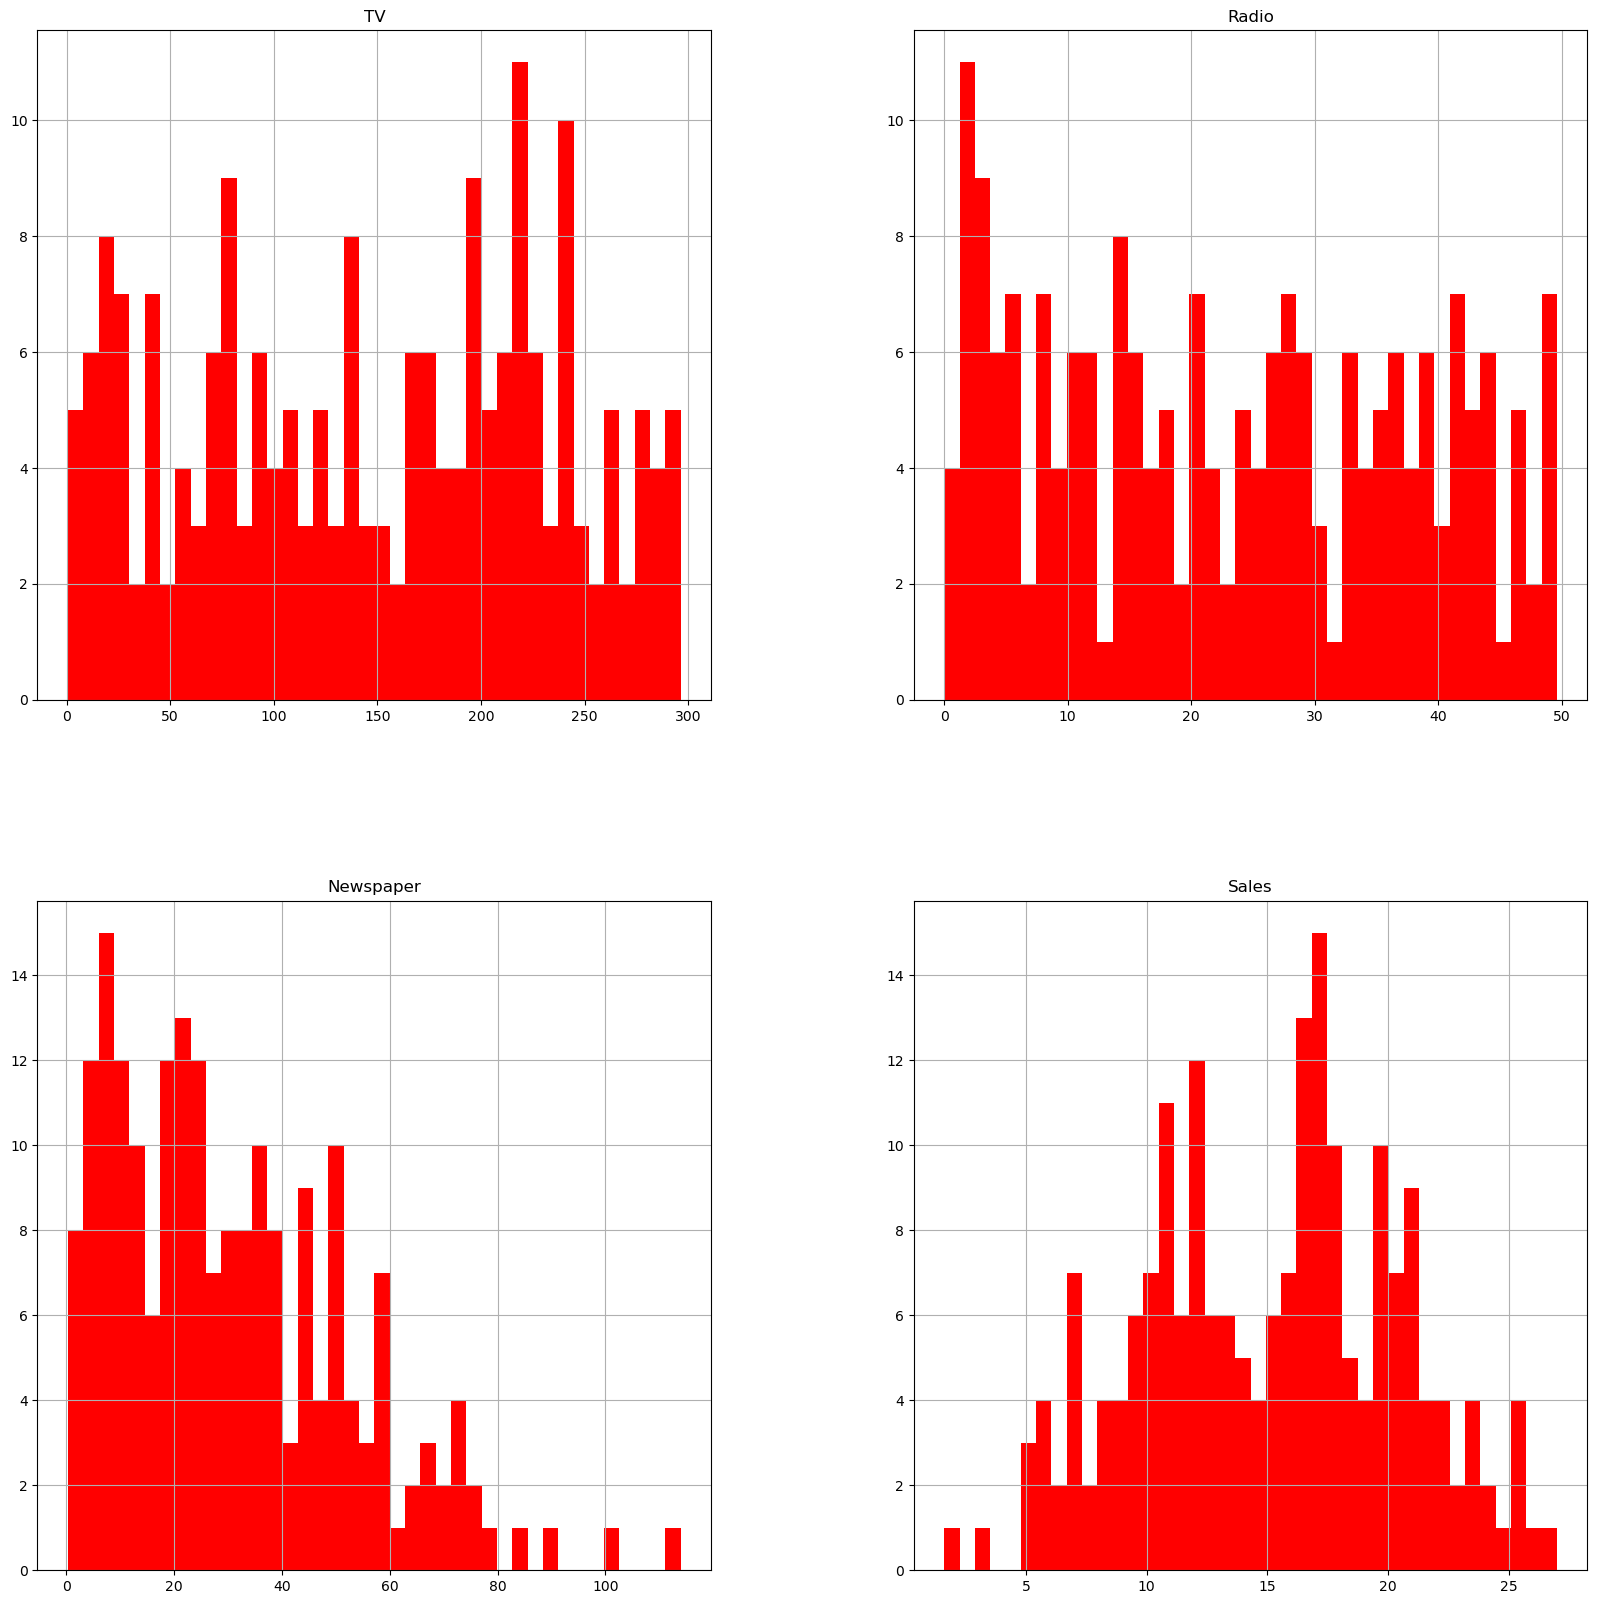

In [10]:
df.hist(bins=40,figsize=(20,20),color = 'red')
plt.show()

In [11]:
# Drop unnecessary columns
# df = df.drop(['', '', ''], axis=1)
# df = df.reset_index(drop=True)
# df.columns

In [12]:
# Show categorical columns
print("Categorical columns:")
print(sorted(list(set(df.columns.to_list()) - set(df._get_numeric_data().columns.to_list()))))

Categorical columns:
[]


In [13]:
# Encode categorical columns
# categorical_cols = list(set(df.columns.to_list()) - set(df._get_numeric_data().columns.to_list()))

# for col in categorical_cols:
#     mapping = dict()
#     values = sorted(df[col].unique())

#     for i in range(len(values)):
#         mapping[values[i]] = i

#     enc_map =[{'col': col, 'mapping': mapping}]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df = enc.fit_transform(df)

X = df.drop(['Sales'], axis=1)
y = df['Sales']
X = pd.get_dummies(X)
df = pd.concat([X, y], axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
# Separate features and labels
y = df['Sales']
X_num = df.drop(['Sales'], axis=1)

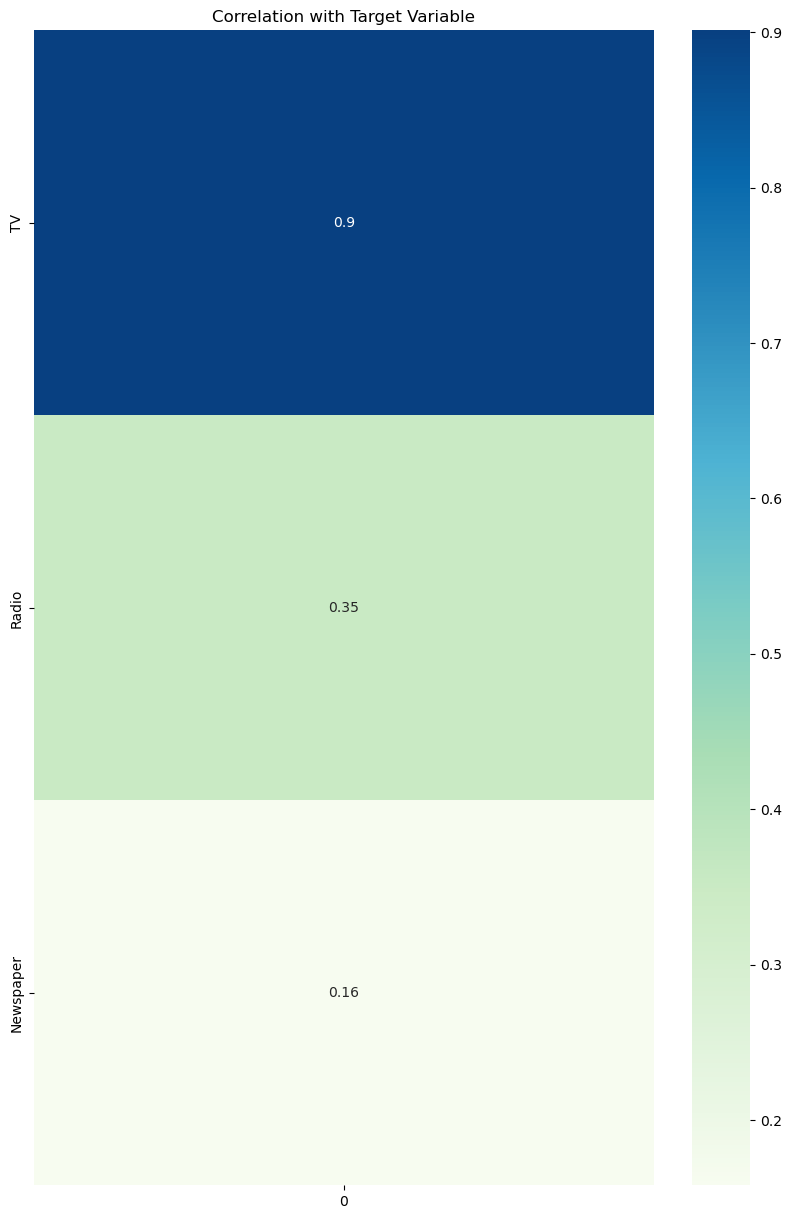

In [16]:
# Create a correlation matrix with target variable
corr_with_target = X_num.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 15))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

<Axes: >

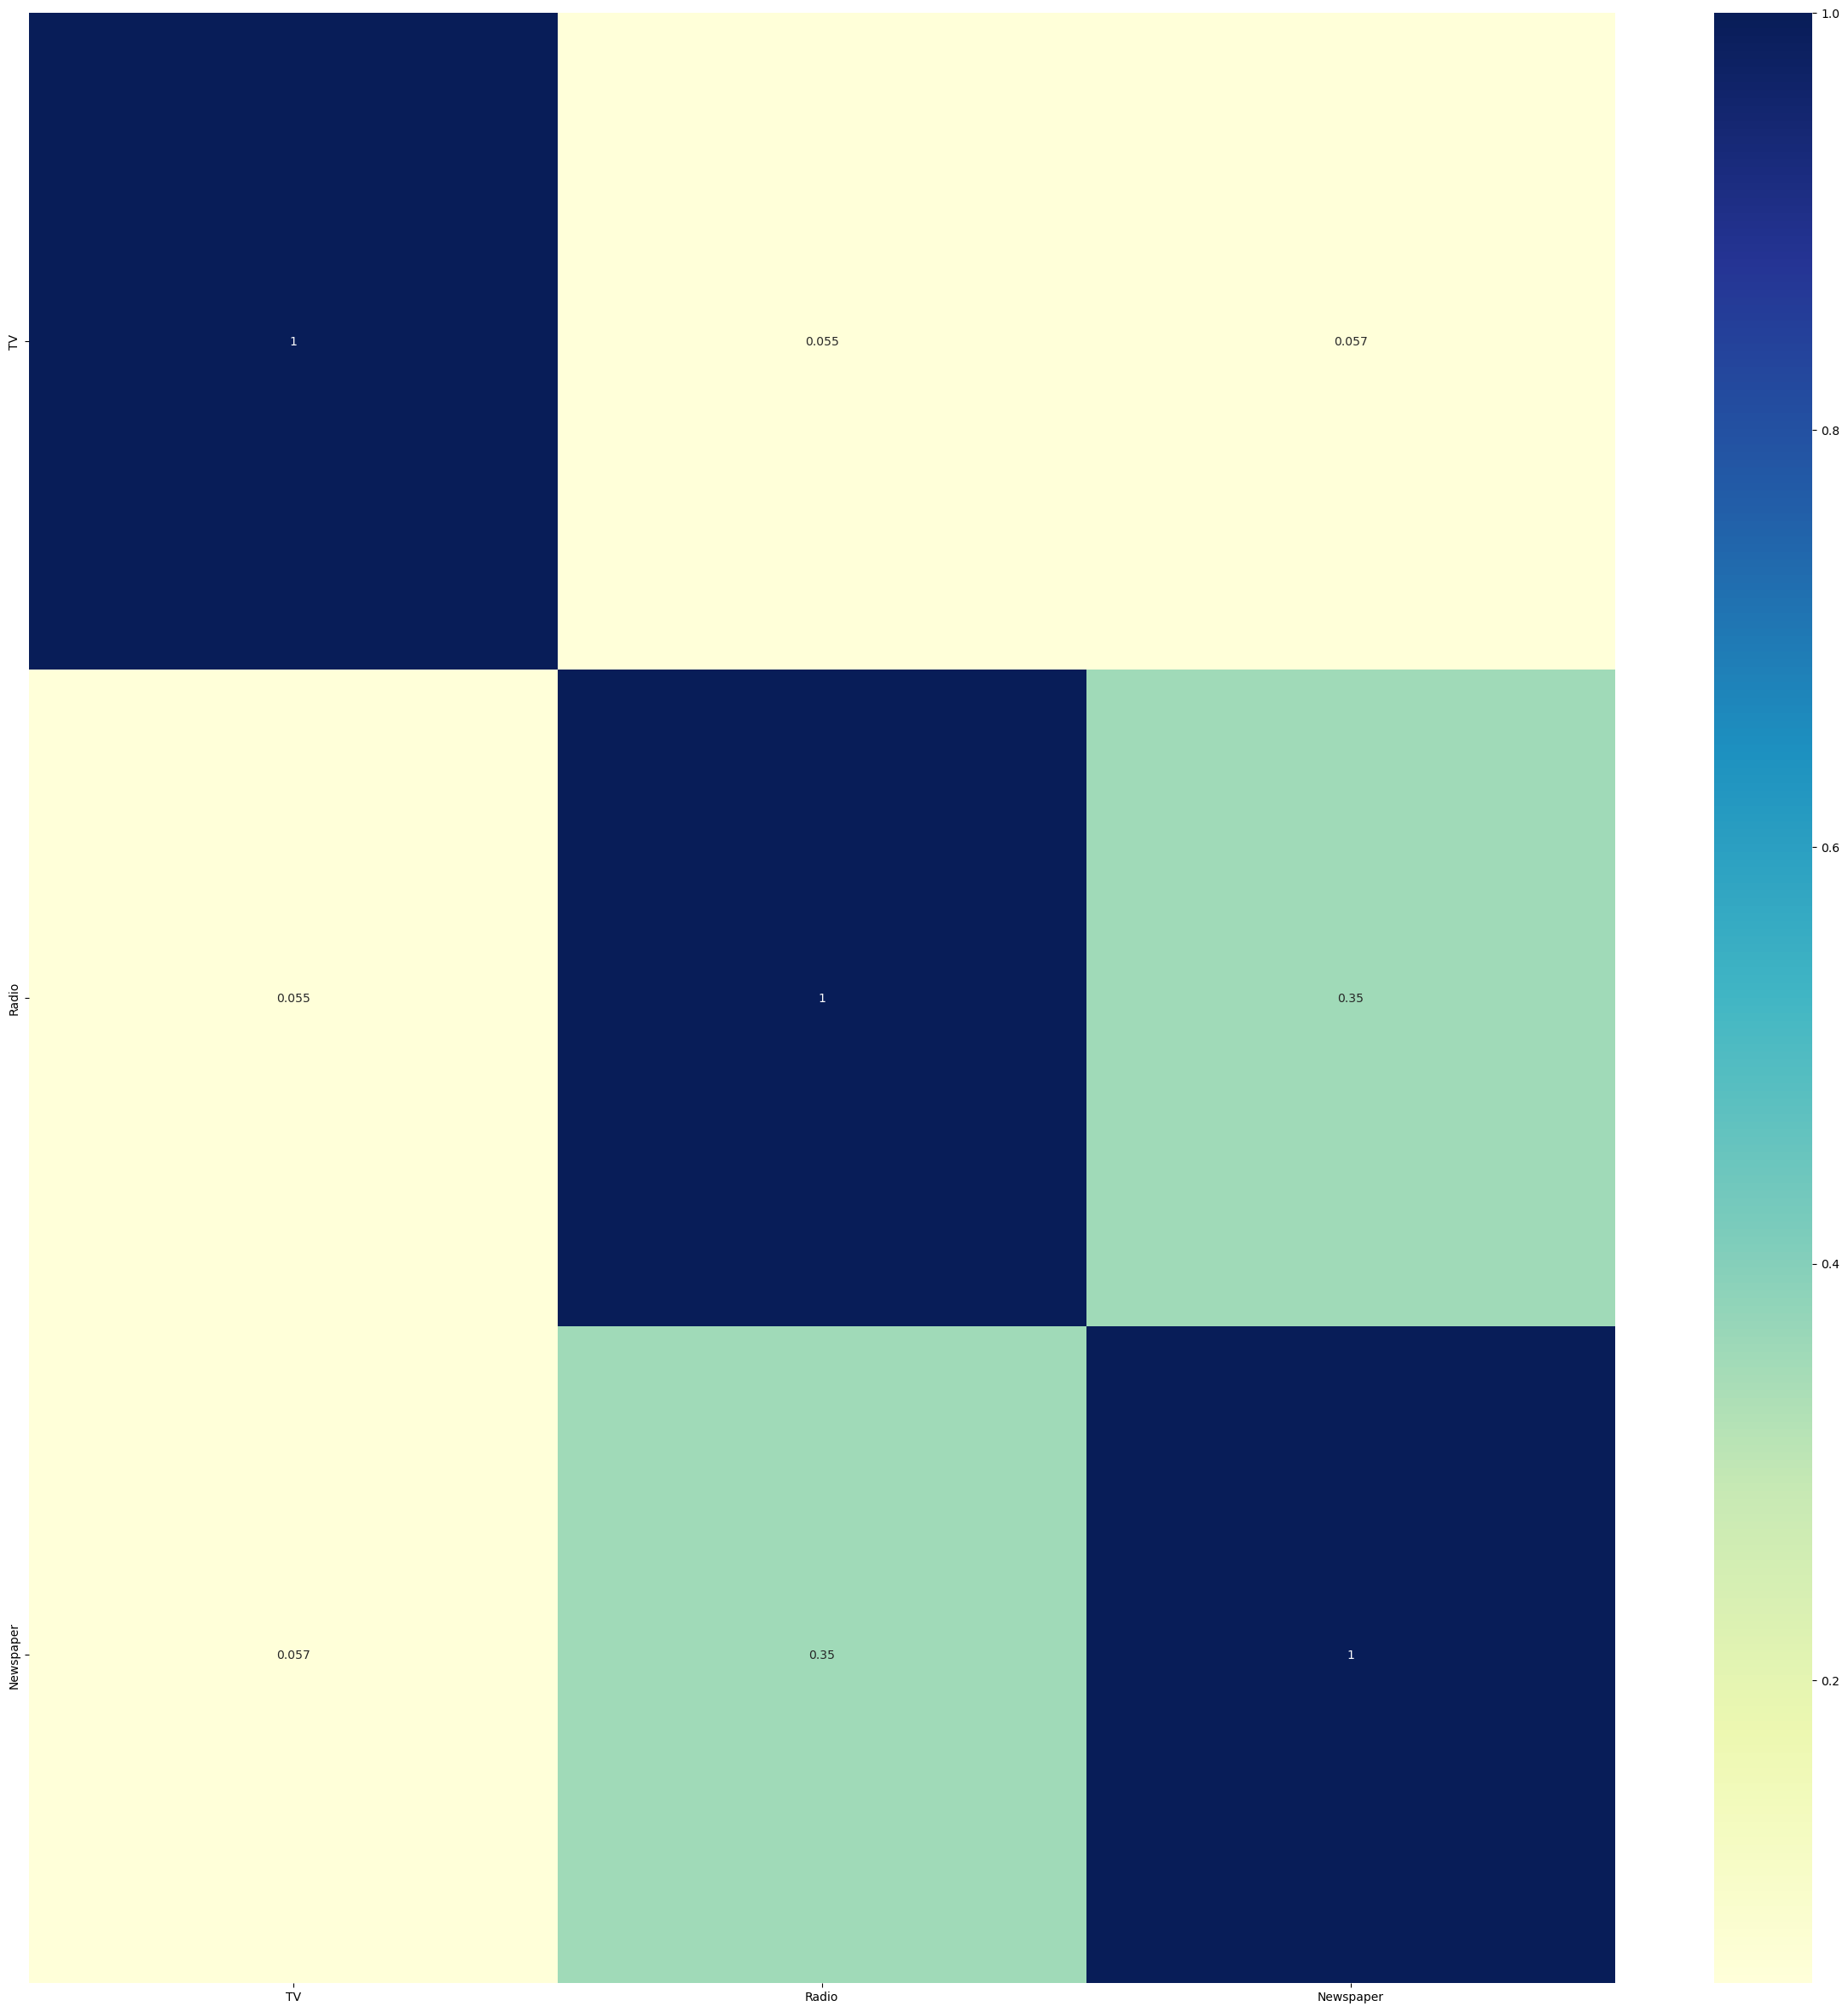

In [17]:
# Displaying heatmap
plt.subplots(figsize=(30,30))
sns.heatmap(X_num.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [18]:
def get_outliers(df_column):
    q3 = df_column.quantile(0.75)
    q1 = df_column.quantile(0.25)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    outliers = df[df_column > upper_bound]

    return upper_bound, lower_bound, outliers

<Axes: ylabel='TV'>

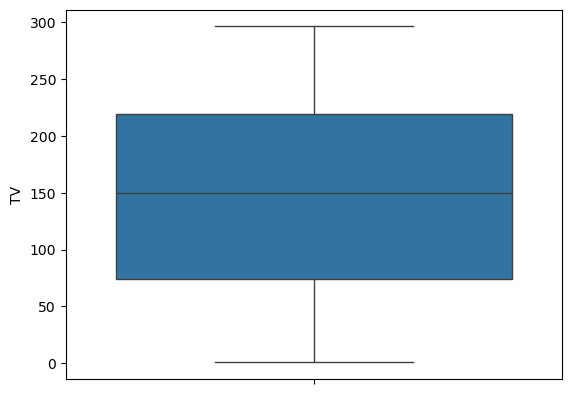

In [19]:
# Box plot
sns.boxplot(y = 'TV', data = df)

After removing outliers...


<Axes: ylabel='TV'>

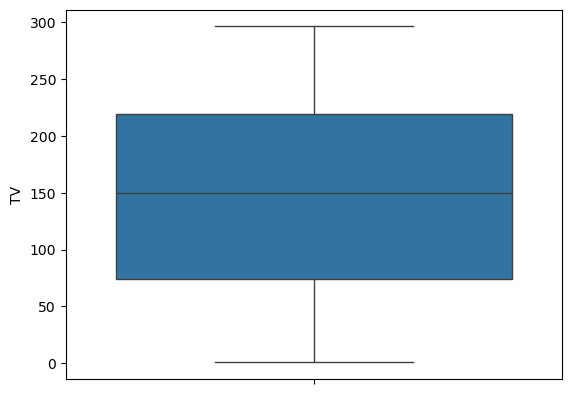

In [20]:
# Removing outliers
upper_bound, lower_bound, outliers = get_outliers(df['TV'])
df = df[lower_bound <= df['TV']]
df = df.reset_index(drop=True)
df = df[df['TV'] <= upper_bound]
df = df.reset_index(drop=True)
print("After removing outliers...")
sns.boxplot(y = 'TV', data = df)

<Axes: ylabel='Newspaper'>

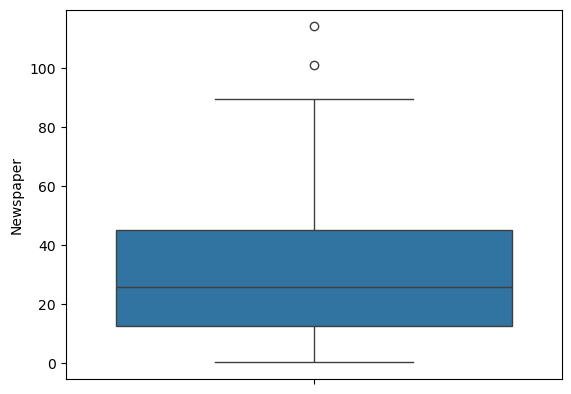

In [21]:
# Box plot
sns.boxplot(y = 'Newspaper', data = df)

After removing outliers...


<Axes: ylabel='Newspaper'>

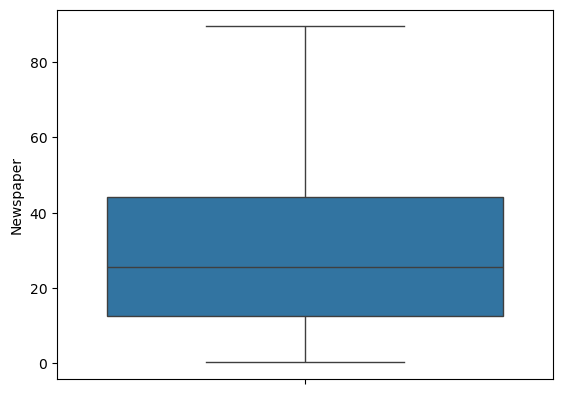

In [22]:
# Removing outliers
upper_bound, lower_bound, outliers = get_outliers(df["Newspaper"])
df = df[lower_bound <= df['Newspaper']]
df = df.reset_index(drop=True)
df = df[df['Newspaper'] <= upper_bound]
df = df.reset_index(drop=True)
print("After removing outliers...")
sns.boxplot(y = 'Newspaper', data = df)

<Axes: ylabel='Radio'>

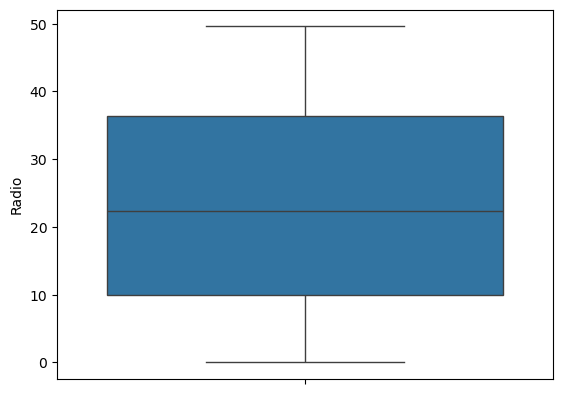

In [23]:
# Box plot
sns.boxplot(y = 'Radio', data = df)

After removing outliers...


<Axes: ylabel='Radio'>

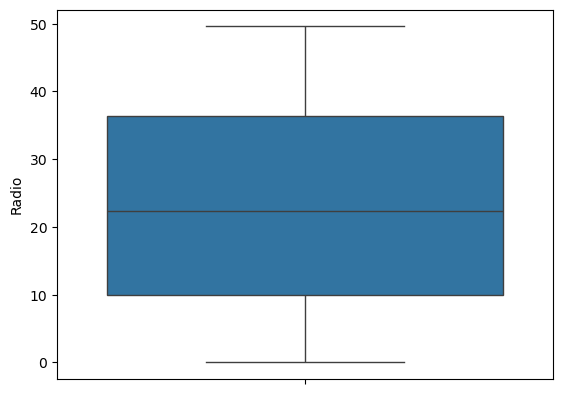

In [24]:
# Removing outliers
upper_bound, lower_bound, outliers = get_outliers(df["Radio"])
df = df[lower_bound <= df['Radio']]
df = df.reset_index(drop=True)
df = df[df['Radio'] <= upper_bound]
df = df.reset_index(drop=True)
print("After removing outliers...")
sns.boxplot(y = 'Radio', data = df)

<Axes: ylabel='Sales'>

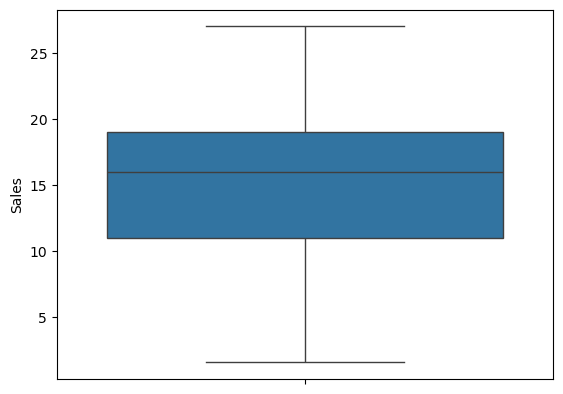

In [25]:
# Box plot
sns.boxplot(y = 'Sales', data = df)

After removing outliers...


<Axes: ylabel='Sales'>

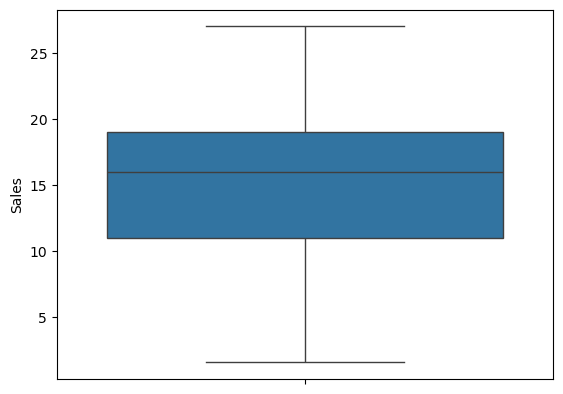

In [26]:
# Removing outliers
upper_bound, lower_bound, outliers = get_outliers(df["Sales"])
df = df[lower_bound <= df['Sales']]
df = df.reset_index(drop=True)
df = df[df['Sales'] <= upper_bound]
df = df.reset_index(drop=True)
print("After removing outliers...")
sns.boxplot(y = 'Sales', data = df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [28]:
# MinMax Scaling
df_cat = df.select_dtypes(include=['object', 'bool'])
df_numeric = df[list(set(df.columns.to_list()) - set(df_cat.columns.to_list()))]
df_numeric_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_numeric), columns=df_numeric.columns)
df = pd.concat([df_numeric_scaled, df_cat], axis=1)
df

,Sales,Radio,Newspaper,TV
0,0.807087,0.762097,0.773288,0.783202
1,0.346457,0.792339,0.502806,0.149539
2,0.409449,0.925403,0.774411,0.056333
3,0.586614,0.832661,0.653199,0.514851
4,0.641732,0.217742,0.652076,0.614886
...,...,...,...,...
193,0.236220,0.074597,0.151515,0.128030
194,0.488189,0.098790,0.087542,0.319222
195,0.519685,0.187500,0.068462,0.601912
196,0.940945,0.846774,0.739618,0.965859


# 3. Data Splitting

In [29]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Linear Regression

In [30]:
# Model training
model = LinearRegression().fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [31]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R2:", r2)

print("Linear Regression")
evaluate_model(model, X_test, y_test)

Linear Regression
MAE: 0.048467537658111806
MSE: 0.0037443873544446443
RMSE: 0.061191399350273436
R2: 0.9130003152798273


# 6. No Tuning